# Create a MDAnalysis universe

In [1]:
import numpy as np
import MDAnalysis as mda
import nmrformd as nmrmd

In [2]:
datapath = "./gromacs-inputs/"

In [3]:
u = mda.Universe(datapath+"prod.tpr", datapath+"prod.xtc")

In [4]:
group_H = u.select_atoms("type H*")
group_H_water = u.select_atoms("resname SOL and type H*")
group_H_polymer = u.select_atoms("resname PEG and type H*")

In [5]:
n_water_molecules = group_H_water.n_residues
print(f"The number of water molecules is {n_water_molecules}")
n_polymer_molecules = group_H_polymer.n_residues
print(f"The number of PEG molecules is {n_polymer_molecules}")

The number of water molecules is 334
The number of PEG molecules is 20


# Run NMRforMD

In [8]:
PEG_nmr = nmrmd.NMR(u, group_H_polymer, neighbor_group=group_H, number_i=20)
print("a")
H2O_nmr = nmrmd.NMR(u, group_H_water, neighbor_group=group_H, number_i=20)
print("b")

a
b


# Extract T1

In [9]:
T1_PEG = np.round(PEG_nmr.T1,2)
print(f"NMR relaxation time T1 - PEG = {T1_PEG} s")
T1_H2O = np.round(H2O_nmr.T1,2)
print(f"NMR relaxation time T1 - H2O = {T1_H2O} s")

NMR relaxation time T1 - PEG = 9.79 s
NMR relaxation time T1 - H2O = 5.43 s


# Plot the spectrum

In [10]:
from matplotlib import pyplot as plt

In [11]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
fontsize = 30
font = {'family': 'sans', 'color':  'black', 'weight': 'normal', 'size': fontsize}
myblue = [0/ 255, 150/255, 177/ 255]
lightgray = [0.1, 0.1, 0.1]
darkgray = [0.9, 0.9, 0.9]
myred= [255/ 255, 77/255, 77/ 255]

In [12]:
import sys
sys.path.append('../shared/')
from tools import figure_improvement, save_figure

#### Plot one figure for the light mode, and one figure for the dark mode

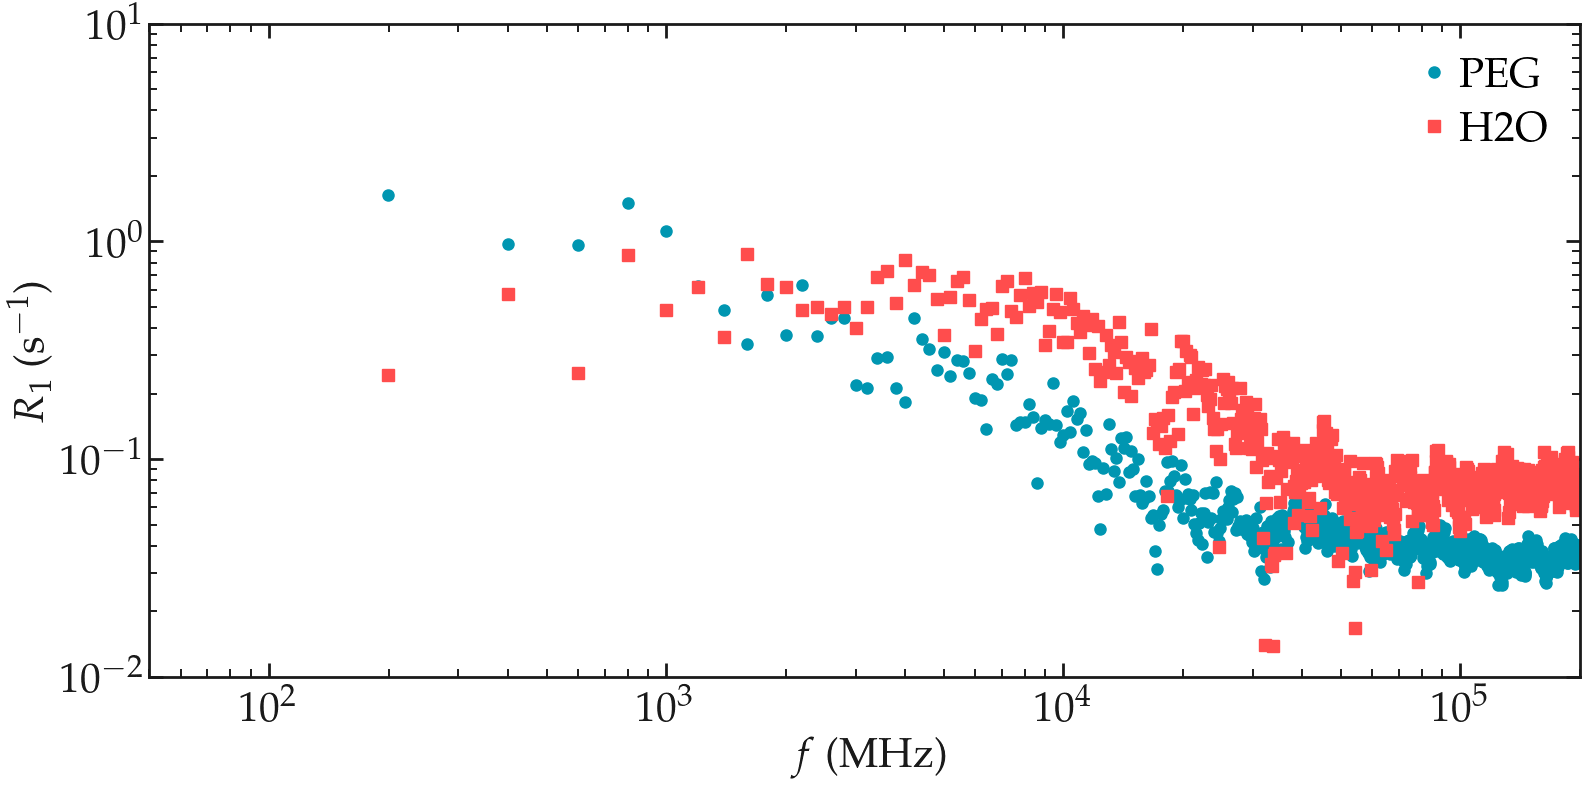

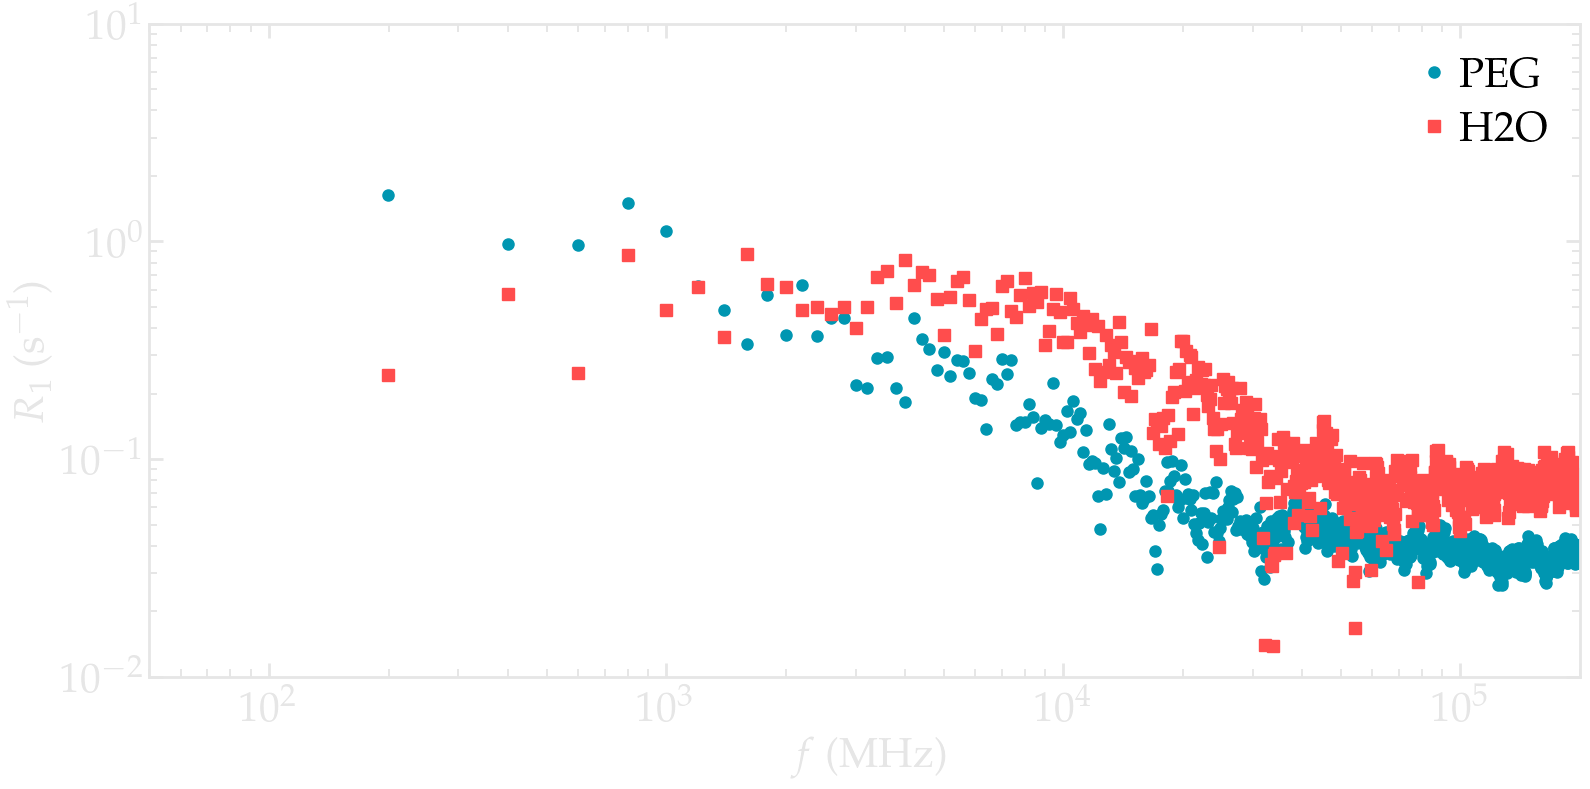

In [13]:
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(111)
    ax1.loglog(PEG_nmr.f[:-60], PEG_nmr.R1[:-60], 'o', markersize=8, color=myblue, label=r'PEG')
    ax1.loglog(PEG_nmr.f[:-60], H2O_nmr.R1[:-60], 's', markersize=8, color=myred, label=r'H2O')
    figure_improvement(ax1, mygray, font, fontsize,
                       xlabel=r"$f$ (MHz)", ylabel=r'$R_1$ (s$^{-1}$)',
                       xlim=(5e1, 2e5), ylim=(0.01, 10))
    save_figure(plt, fig, mode, name='R1')

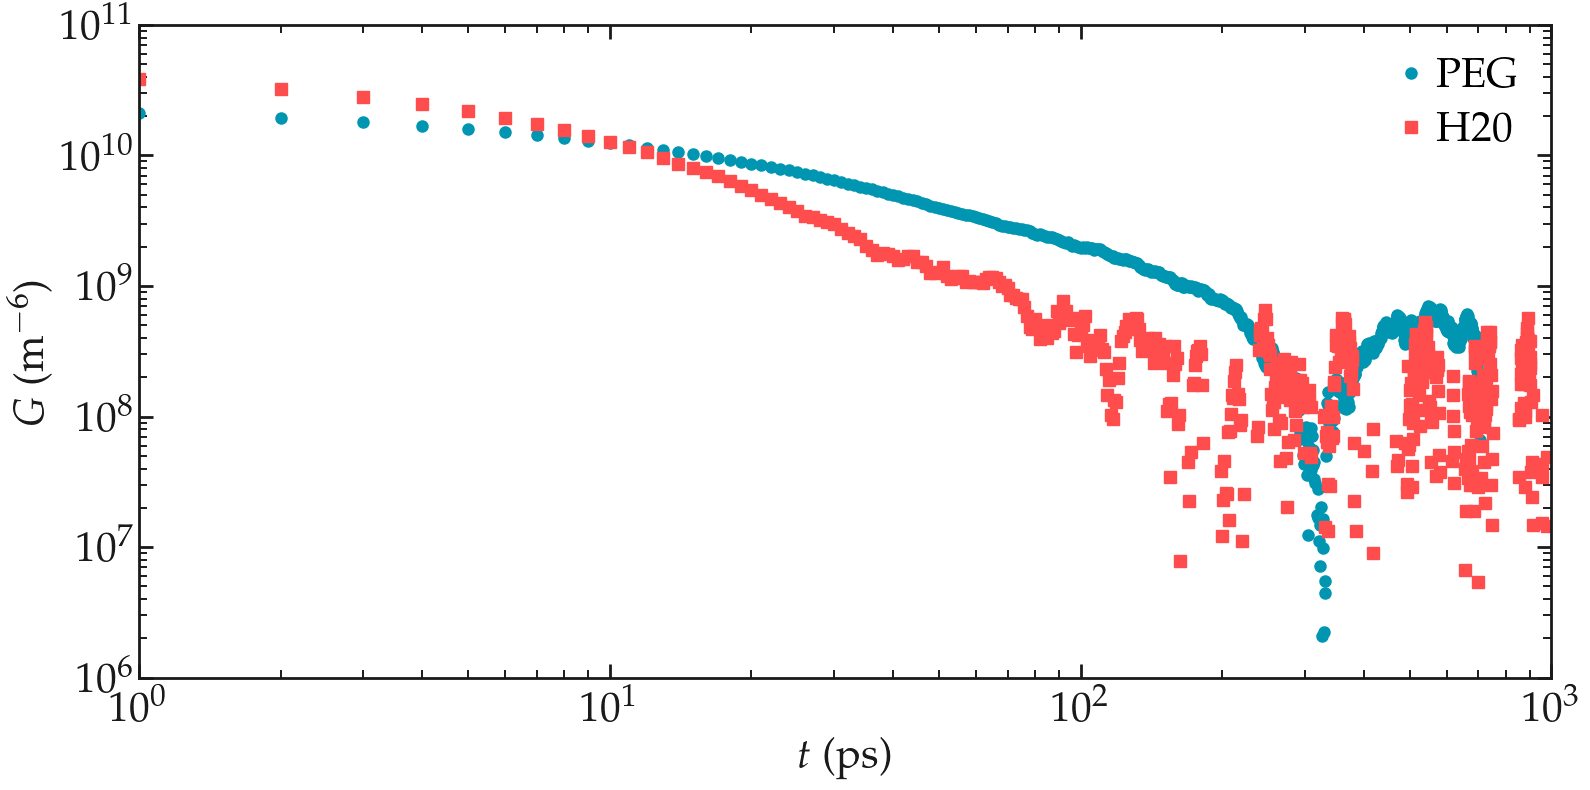

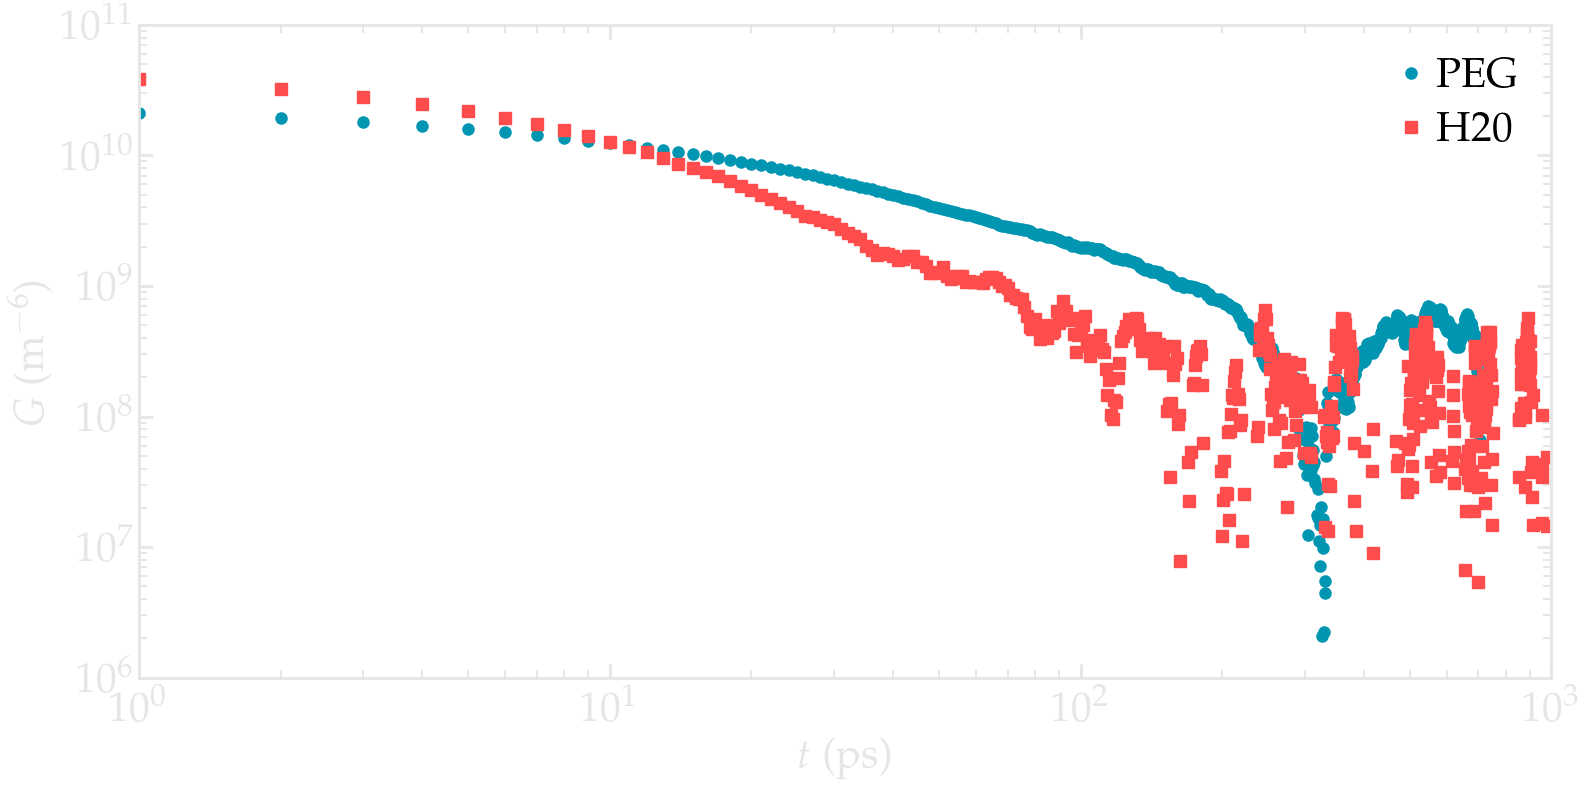

In [15]:
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(111)
    ax1.loglog(PEG_nmr.t[:-20], PEG_nmr.gij[0][:-20], 'o', markersize=8, color=myblue, label=r'PEG')
    ax1.loglog(H2O_nmr.t[:-20], H2O_nmr.gij[0][:-20], 's', markersize=8, color=myred, label=r'H20')
    figure_improvement(ax1, mygray, font, fontsize,
                       xlabel=r"$t$ (ps)", ylabel=r'$G$ (m$^{-6}$)',
                       xlim=(1, 1e3), ylim=(1e6, 1e11))
    save_figure(plt, fig, mode, name='Gij')